# General statistics

* [total views](#total-views)
* [views per year](#views-per-year)
* [views per year per book](#views-per-year-per-book)

In [1]:
from datetime import datetime

print(f"Date of last update: {datetime.now().strftime('%d.%m.%Y, %H:%M')}")

Date of last update: 18.03.2025, 21:58


## Utility functions

In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
from mfnf import MFNF


def md(text):
    display(Markdown(text))


df = MFNF().aggregate_pageviews()

## <span id="total-views">Total views (starting from 2016-01-01)</span>
### Total views of complete project

In [2]:
total_views = df["views"].sum()

md(f"**Total views: {total_views:,}**")

**Total views: 19,799,325**

## Total views per book

In [3]:
views_per_book = df[["book_name", "views"]].groupby("book_name").sum()
views_per_book.sort_values(by="views", inplace=True, ascending=False)
views_per_book["views"] = views_per_book["views"].apply(lambda x: f"{x:,}")
display(views_per_book)

,views
book_name,
Analysis 1,"10,405,977"
Grundlagen der Mathematik,"5,527,625"
Lineare Algebra 1,"2,682,087"
Real Analysis,"305,749"
Mitmachen für (Nicht-)Freaks,"146,101"
Buchanfänge,"83,700"
Maßtheorie,"81,887"
Linear algebra,"64,126"
Über das Projekt,"59,098"


## <span id="views-per-year">Total views per year</span>

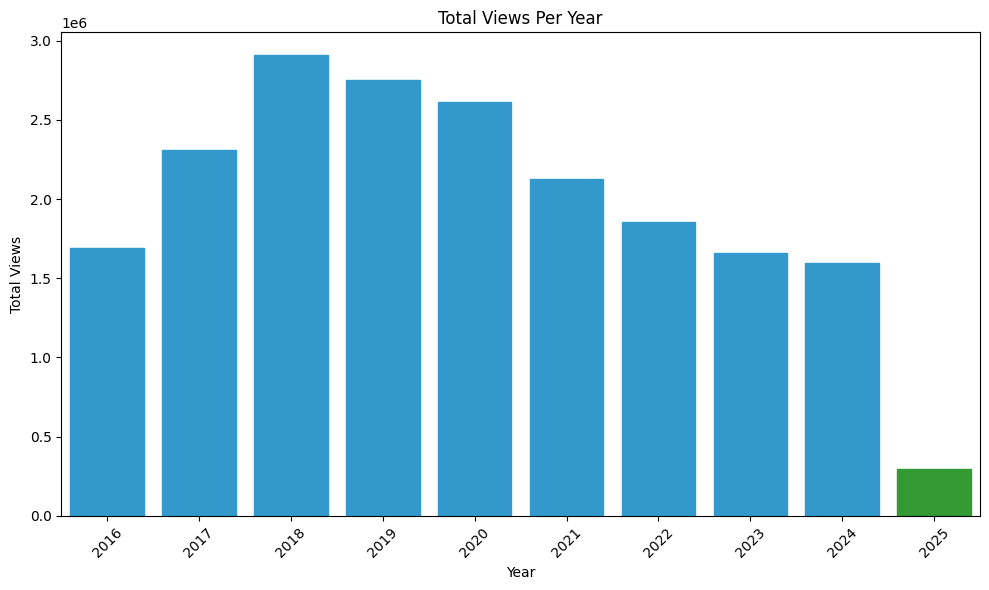

In [4]:
def show_total_views_per_year(df):
    df["year"] = df["timestamp"].dt.year

    # Aggregate views by year
    yearly_views = df.groupby("year")["views"].sum().reset_index()

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=yearly_views, x="year", y="views")

    # Customize the last bar with a different color
    ax = plt.gca()
    for patch in ax.patches[:-1]:
        patch.set_color(
            (0.2, 0.6, 0.8)
        )  # Set a different color for all but the last bar
    ax.patches[-1].set_color((0.2, 0.6, 0.2))  # Set the last bar to a distinct color

    # Add plot labels and title
    plt.title("Total Views Per Year")
    plt.xlabel("Year")
    plt.ylabel("Total Views")
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.tight_layout()
    plt.show()


show_total_views_per_year(df.copy())

## <span id="views-per-year-per-book">Total views per year per book</span>

### Analysis 1

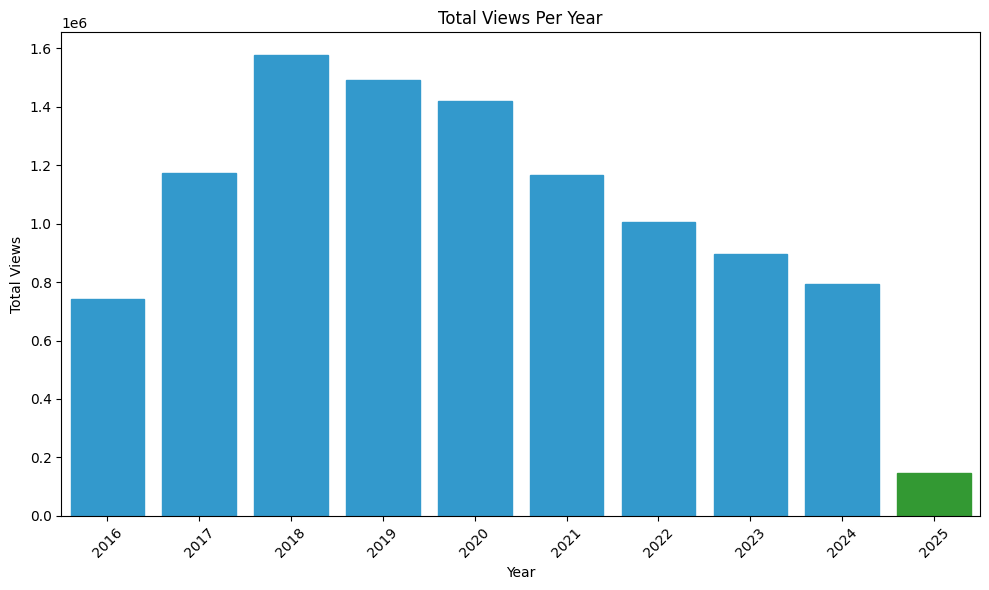

### Grundlagen der Mathematik

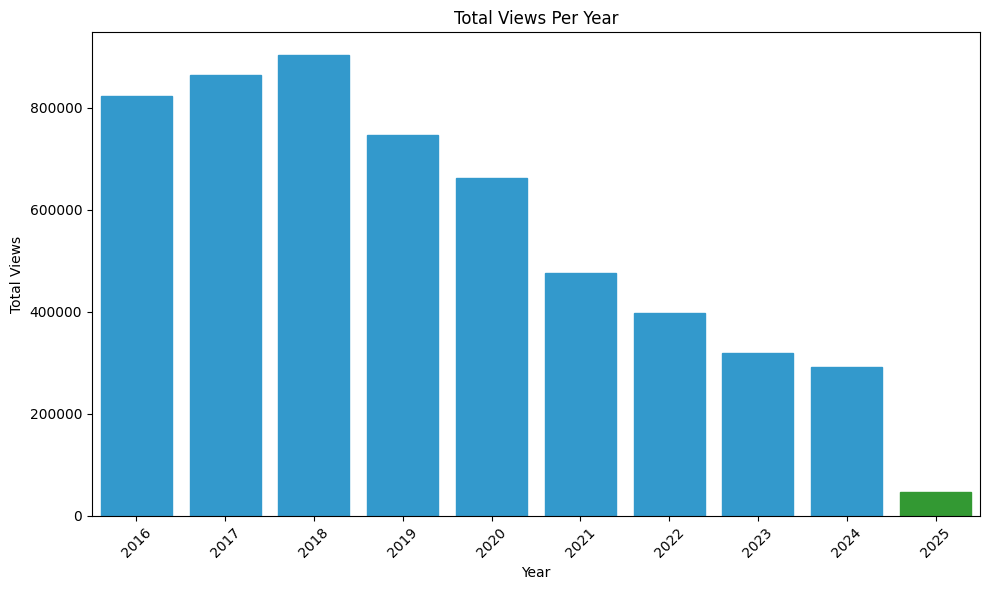

### Lineare Algebra 1

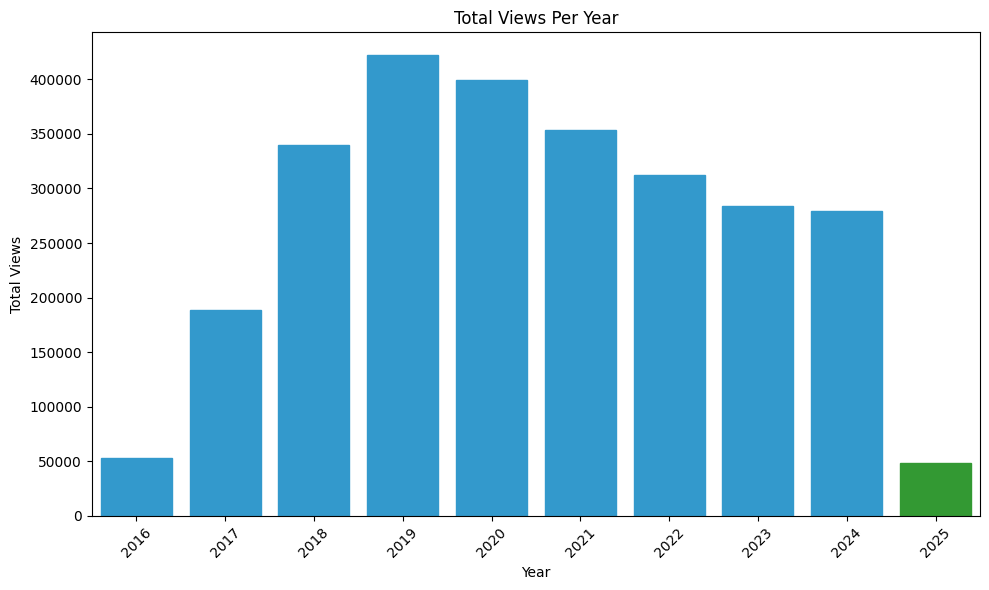

### Maßtheorie

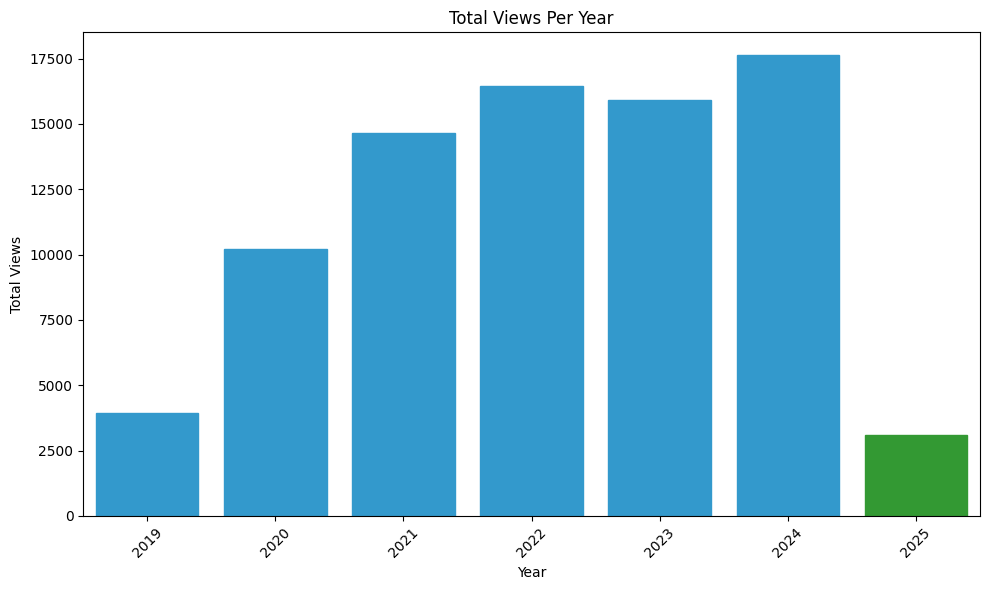

### Real Analysis

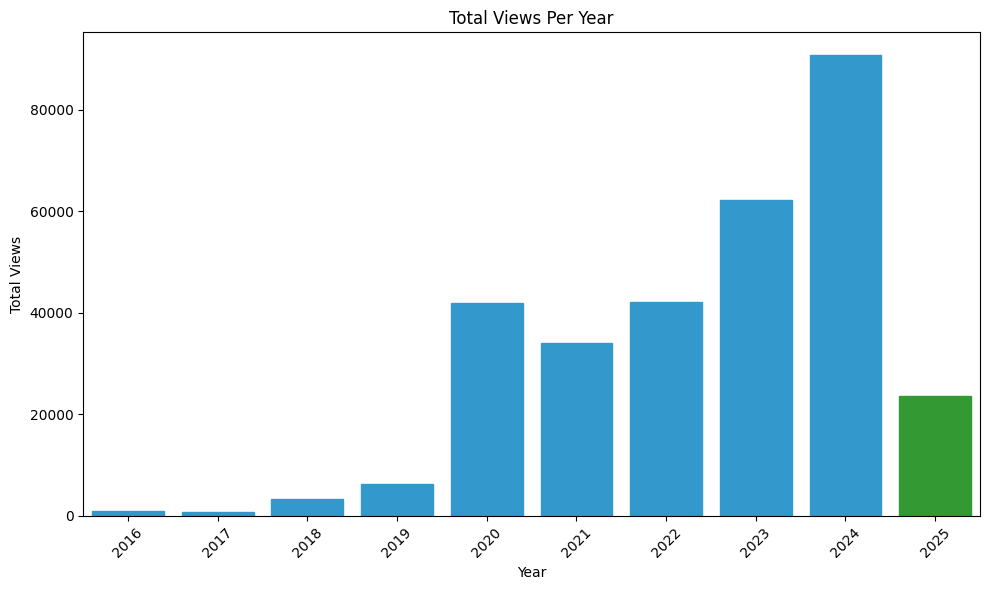

### Linear algebra

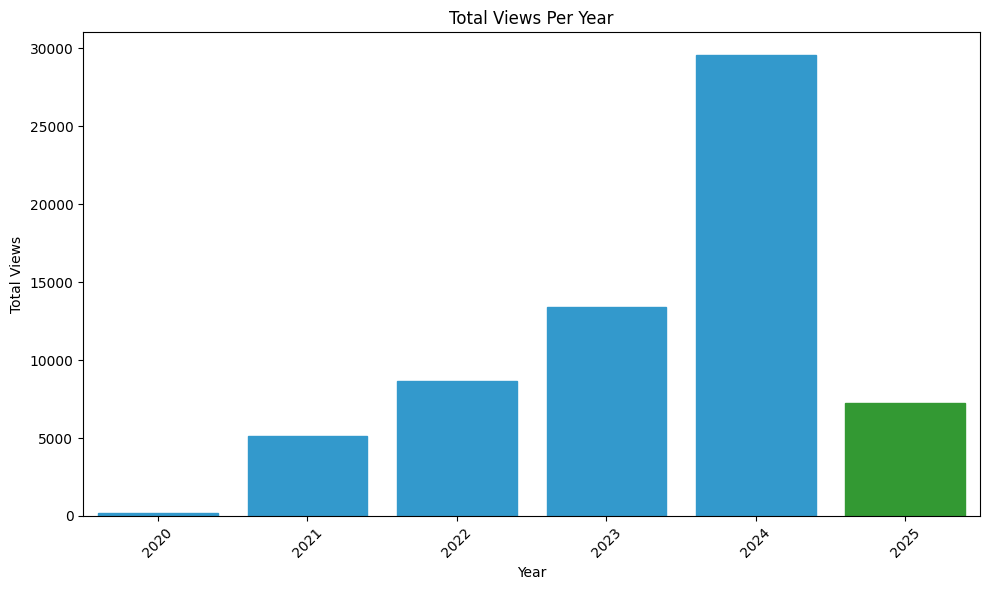

### Measure theory

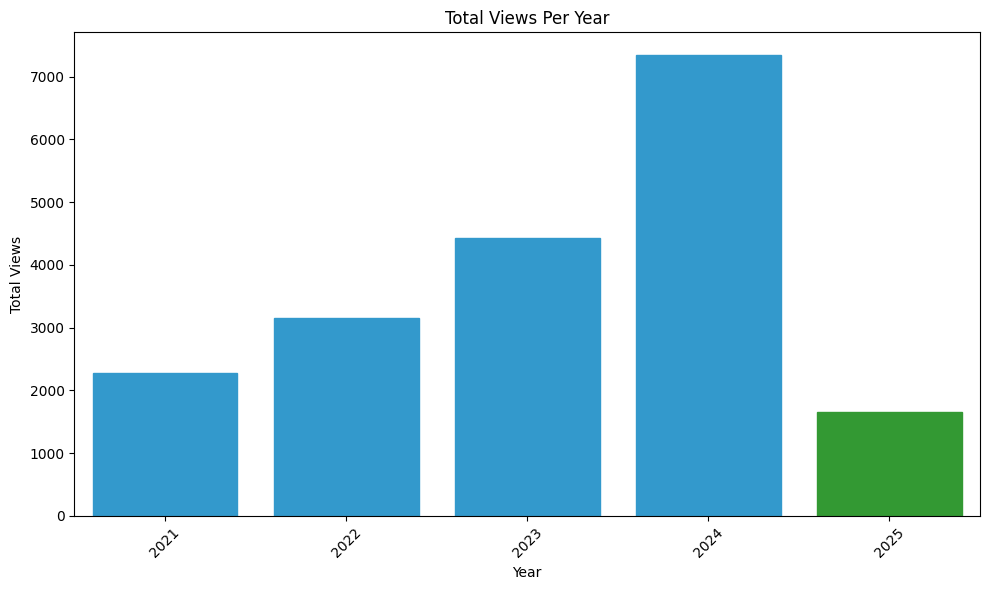

In [5]:
from mfnf import books

for book in books:
    md(f"### {book}")

    show_total_views_per_year(df[df["book_name"] == book].copy())

## License of this report

Copyright YEAR Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.